# Project Name -     Stock Market Performance Analysis

This project comprises analysis of stock market data for 4 companies. The four companies are Amazon, Google, Microsoft, and Apple.

## Introduction


A stock market, also known as an equity market or share market, is an aggregation of buyers and sellers of stocks, which represent ownership claims on businesses; these may include securities listed on a public stock exchange, as well as those traded privately between parties. 

Exploratory data analysis (EDA) is a valuable tool for gaining insights into the behavior of stocks and identifying patterns that may inform investment decisions. 

In this project, we will conduct an EDA of stock market data for four companies: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), and Google (GOOG). 

We will analyze historical stock prices, volumes, and fundamental metrics to gain insights into the performance and financial health of these companies.

## Data Collection and Preparation

We will collect stock market data for the four companies from Yahoo Finance. The data will include daily closing prices, volumes, High-Low, Open Prices and Adj Close. We will then clean and prepare the data for analysis.

Importing Python Libraries that are needed for visualization and analysis of the data.

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
from datetime import datetime

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
from plotly.offline import iplot
import plotly as py
import plotly.tools as tls

In [4]:
import numpy as np
import cufflinks as cf 
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

### Importing data from yfinance Library.


Yfinance is a Python library that provides a convenient interface to the extensive financial data available on Yahoo Finance. 

It allows users to retrieve historical and real-time stock prices, fundamental data, options data, and other financial information with ease. 

Yfinance is widely used by individual investors, financial analysts, and quantitative researchers alike.

In [5]:
tickers = ['AAPL','GOOG','AMZN','MSFT']
df_list = []

start_date = datetime.now()-pd.DateOffset(years=10)
end_date = datetime.now()

for ticker in tickers:
    data = yf.download(ticker,start = start_date, end = end_date)
    df_list.append(data)
df = pd.concat(df_list, keys=tickers, names=['Company'])

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Understanding our data by using in-built functions such as head(), info(), describe(), etc.

In [6]:
df.head()

Open       High        Low      Close  Adj Close  \
Company Date                                                                
AAPL    2013-12-05  20.451786  20.540714  20.228930  20.282143  17.781183   
        2013-12-06  20.206785  20.241072  19.984644  20.000713  17.534460   
        2013-12-09  20.032143  20.342142  20.032143  20.229643  17.735149   
        2013-12-10  20.127857  20.281429  20.042856  20.198214  17.707598   
        2013-12-11  20.250000  20.391787  19.988930  20.048571  17.576408   

                       Volume  
Company Date                   
AAPL    2013-12-05  447580000  
        2013-12-06  344352400  
        2013-12-09  320493600  
        2013-12-10  278269600  
        2013-12-11  359718800

In [7]:
df.tail()

Open        High         Low       Close  \
Company Date                                                         
MSFT    2023-11-28  378.350006  383.000000  378.160004  382.700012   
        2023-11-29  383.760010  384.299988  377.440002  378.850006   
        2023-11-30  378.489990  380.089996  375.470001  378.910004   
        2023-12-01  376.760010  378.160004  371.309998  374.510010   
        2023-12-04  369.100006  369.519989  362.899994  369.140015   

                     Adj Close    Volume  
Company Date                              
MSFT    2023-11-28  382.700012  20453100  
        2023-11-29  378.850006  28963400  
        2023-11-30  378.910004  30554400  
        2023-12-01  374.510010  33020400  
        2023-12-04  369.140015  32037800

In [8]:
df= df.reset_index()

In [9]:
df.head()

Company       Date       Open       High        Low      Close  Adj Close  \
0    AAPL 2013-12-05  20.451786  20.540714  20.228930  20.282143  17.781183   
1    AAPL 2013-12-06  20.206785  20.241072  19.984644  20.000713  17.534460   
2    AAPL 2013-12-09  20.032143  20.342142  20.032143  20.229643  17.735149   
3    AAPL 2013-12-10  20.127857  20.281429  20.042856  20.198214  17.707598   
4    AAPL 2013-12-11  20.250000  20.391787  19.988930  20.048571  17.576408   

      Volume  
0  447580000  
1  344352400  
2  320493600  
3  278269600  
4  359718800

In [10]:
df.shape

(10064, 8)

In [11]:
df.columns

Index(['Company', 'Date', 'Open', 'High', 'Low', 'Close', 'Adj Close',
       'Volume'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Company    10064 non-null  object        
 1   Date       10064 non-null  datetime64[ns]
 2   Open       10064 non-null  float64       
 3   High       10064 non-null  float64       
 4   Low        10064 non-null  float64       
 5   Close      10064 non-null  float64       
 6   Adj Close  10064 non-null  float64       
 7   Volume     10064 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 629.1+ KB


In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

Company      0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As there is no need of "Adj Close" column during the analysis, so we are going to remove that column from our dataset.

In [15]:
df = df.drop('Adj Close',axis=1)

In [16]:
df.head()

Company       Date       Open       High        Low      Close     Volume
0    AAPL 2013-12-05  20.451786  20.540714  20.228930  20.282143  447580000
1    AAPL 2013-12-06  20.206785  20.241072  19.984644  20.000713  344352400
2    AAPL 2013-12-09  20.032143  20.342142  20.032143  20.229643  320493600
3    AAPL 2013-12-10  20.127857  20.281429  20.042856  20.198214  278269600
4    AAPL 2013-12-11  20.250000  20.391787  19.988930  20.048571  359718800

### Descriptive Statistics 

In [17]:
df.describe()

Open          High           Low         Close        Volume
count  10064.000000  10064.000000  10064.000000  10064.000000  1.006400e+04
mean      93.933593     94.936394     92.919126     93.962853  7.078446e+07
std       72.582319     73.366048     71.779030     72.599873  6.574255e+07
min       14.220000     14.521000     14.200000     14.347500  1.584340e+05
25%       39.132251     39.446874     38.815626     39.139000  2.785822e+07
50%       68.401249     69.392250     67.626751     68.643749  4.963935e+07
75%      133.320255    134.564999    131.660004    133.220001  8.858840e+07
max      383.760010    384.299988    378.160004    382.700012  1.065523e+09

# Univariate Analysis

## Analyze closing price of all the stocks

1) Using Plotly

In [18]:
fig = px.line(df, x='Date', y='Close', color='Company', title="Stock Market Performance for the Last Decade")
fig.show()

2) Using Matplotlib

In [19]:
Company_list = df['Company'].unique()
Company_list

array(['AAPL', 'GOOG', 'AMZN', 'MSFT'], dtype=object)

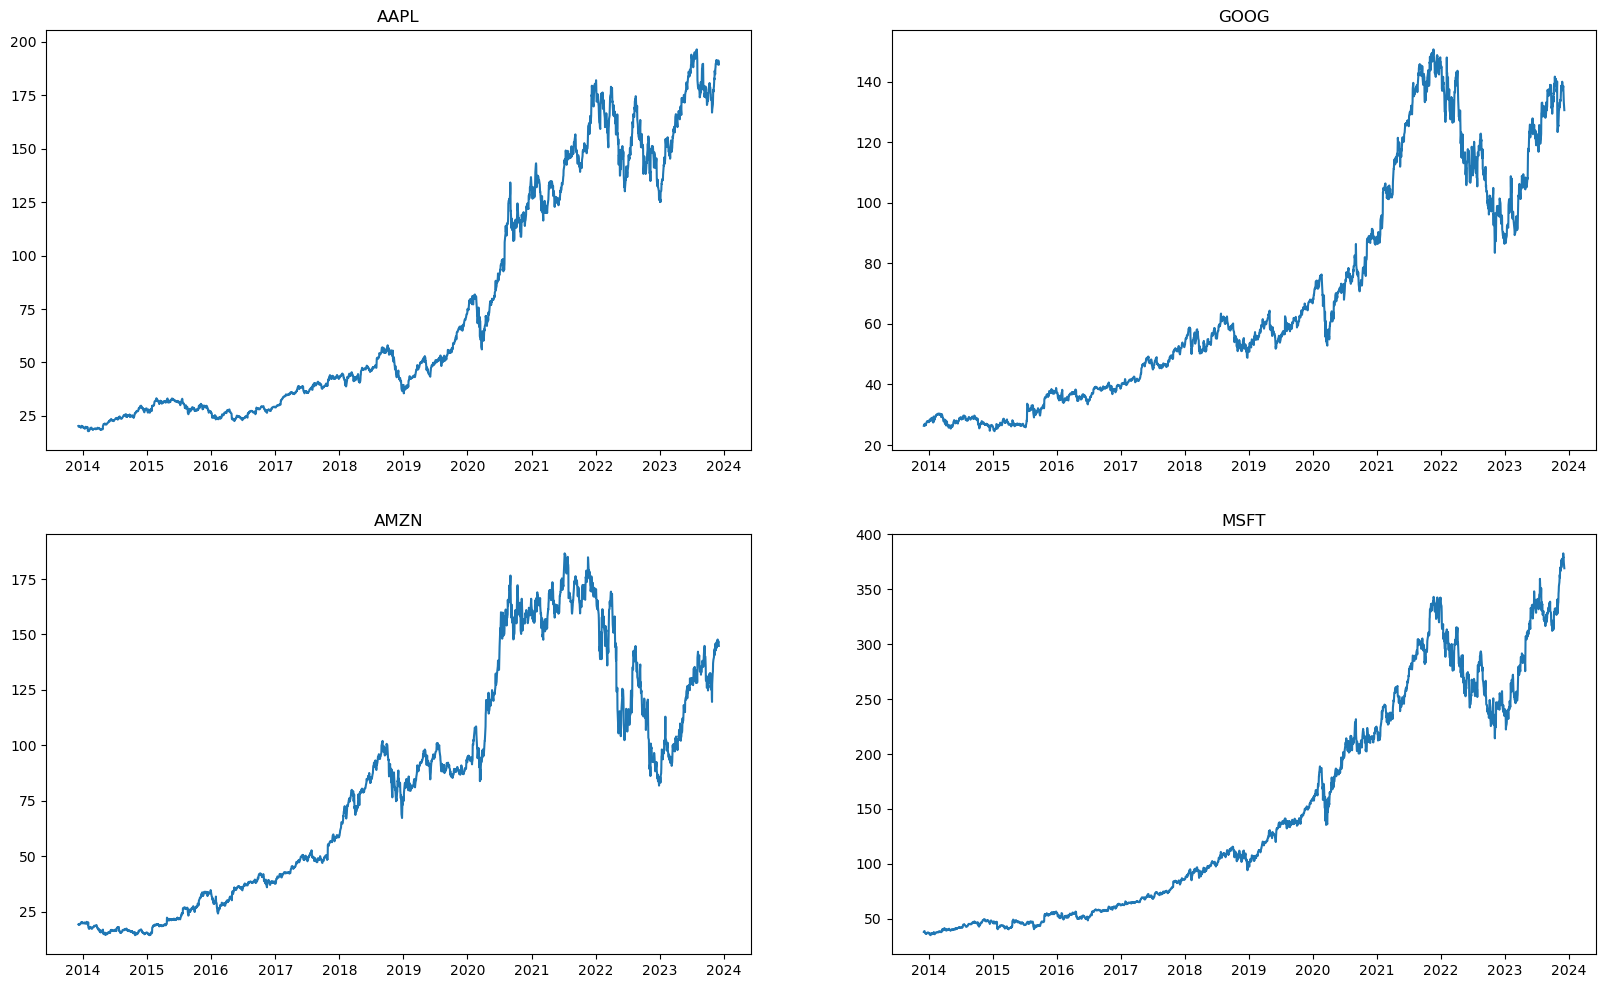

In [20]:
plt.figure(figsize=(20,12))
for i, company in enumerate(Company_list,1):
    plt.subplot(2,2,i)
    df1 = df[df['Company'] == company]
    plt.plot(df1['Date'],df1['Close'])
    plt.title(company)

## Analyze the total volume of stock being traded each day

1) Using Matplotlib

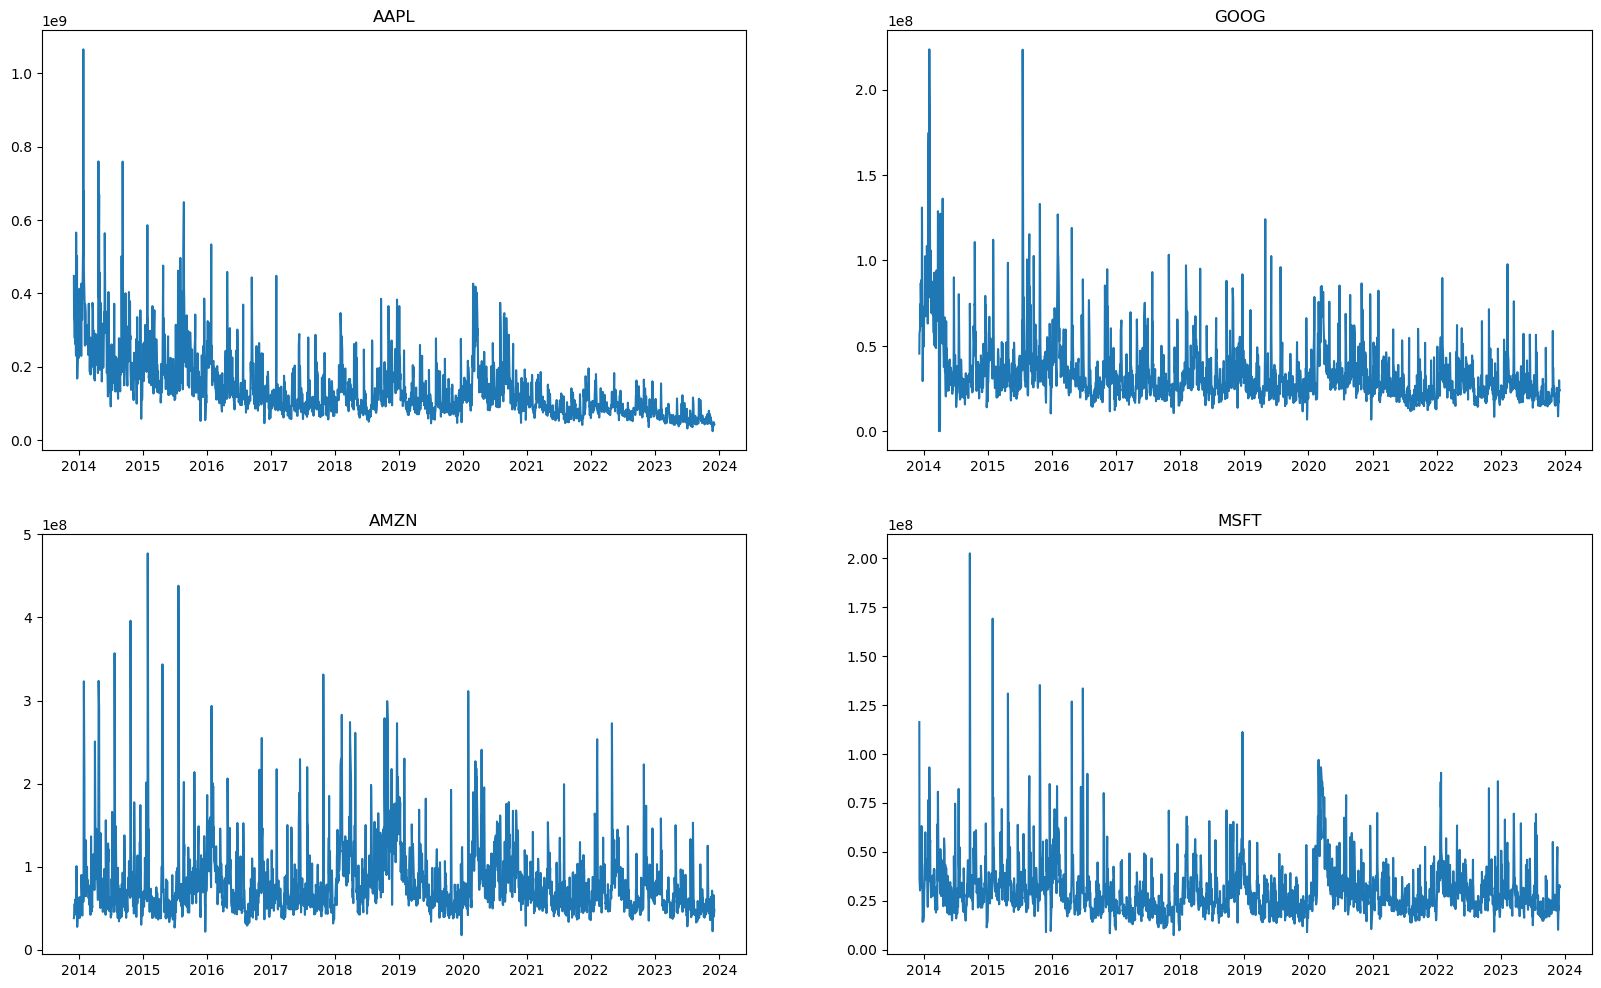

In [21]:
plt.figure(figsize=(20,12))
for i, company in enumerate(Company_list,1):
    plt.subplot(2,2,i)
    df1 = df[df['Company'] == company]
    plt.plot(df1['Date'],df1['Volume'])
    plt.title(company)

2) Using Plotly

In [22]:
for company in Company_list:
    df1 = df[df['Company'] == company]
    df1.iplot(mode = 'lines', x='Date', y='Volume', title = 'Company')

### Dispersion of Data using "Boxplot" - shows outliers which can affect the selling and buying of stocks day by day

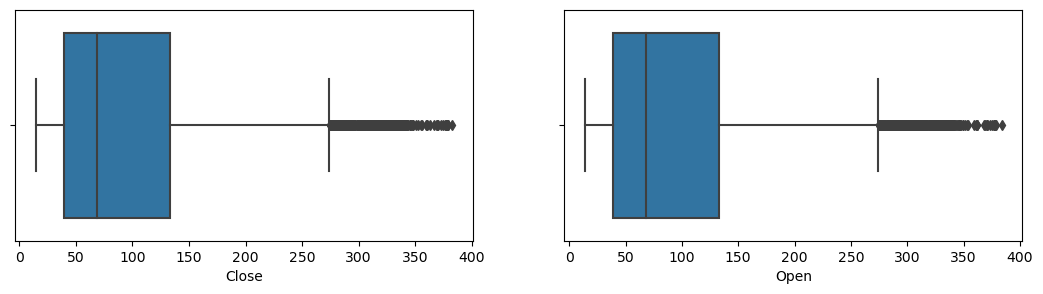

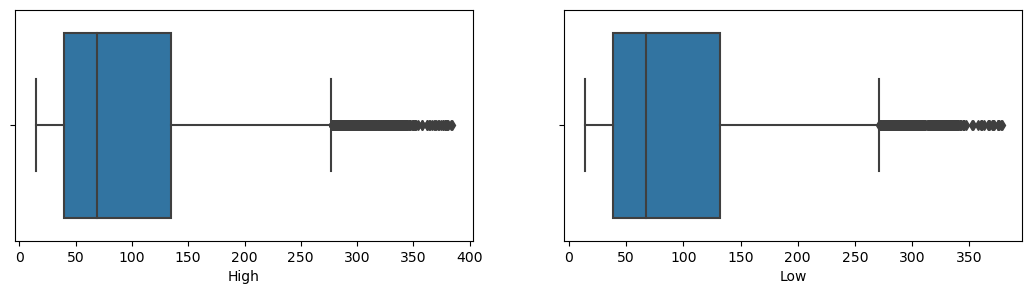

In [23]:
num_cols = ['Close','Open','High','Low']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    
    plt.show()

## Analyze Daily price change in stock

#### Daily Stock Return Formula
To calculate how much you gained or lost per day for a stock, subtract the opening price from the closing price. Then, multiply the result by the number of shares you own in the company.
#### Percentage Return

In [24]:
df['1-day % return'] = ((df['Close']-df['Open'])/df['Close'])*100
df.head()

Company       Date       Open       High        Low      Close     Volume  \
0    AAPL 2013-12-05  20.451786  20.540714  20.228930  20.282143  447580000   
1    AAPL 2013-12-06  20.206785  20.241072  19.984644  20.000713  344352400   
2    AAPL 2013-12-09  20.032143  20.342142  20.032143  20.229643  320493600   
3    AAPL 2013-12-10  20.127857  20.281429  20.042856  20.198214  278269600   
4    AAPL 2013-12-11  20.250000  20.391787  19.988930  20.048571  359718800   

   1-day % return  
0       -0.836418  
1       -1.030323  
2        0.976291  
3        0.348330  
4       -1.004707

In [25]:
df.columns

Index(['Company', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       '1-day % return'],
      dtype='object')

1) Using Matplotlib

<Axes: title={'center': 'Daily Price Change in Stock'}, xlabel='Frequency', ylabel='Daily returns'>

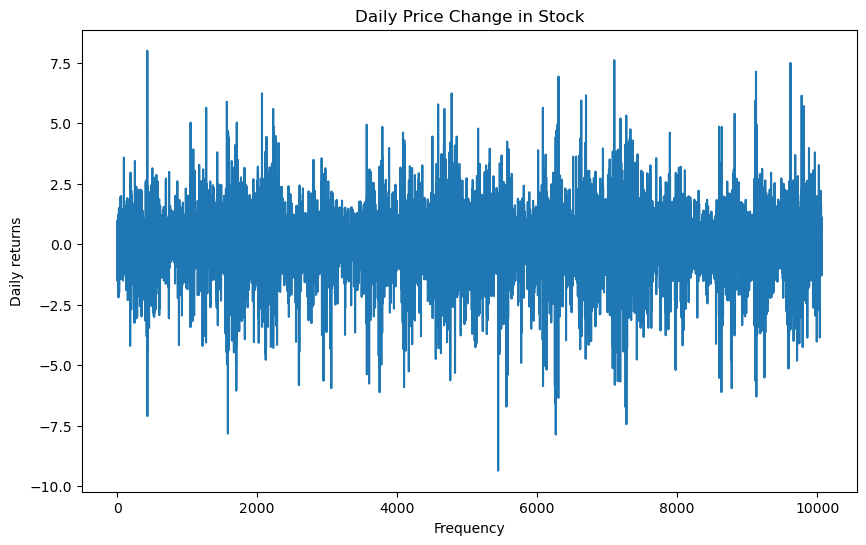

In [26]:
plt.figure(figsize=(10,6))
plt.title('Daily Price Change in Stock')
plt.xlabel('Frequency')
plt.ylabel('Daily returns')
df['1-day % return'].plot()

2) Using Plotly

In [27]:
fig = px.line(df, x="Date", y="1-day % return", title='Daily price change in stock', template = 'plotly_dark')
fig.show()

## Multi-variate Analysis

## Checking if the Stock prices of these tech companies (Amazon, Microsoft, Apple, and Google) are Correlated or not

This type of Analysis is also known as Multi-Variate Analysis

Creating a separate DataFrame for each company.

In [28]:
apple = yf.download('AAPL',start = start_date, end = end_date)
apple.head()

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-12-05  20.451786  20.540714  20.228930  20.282143  17.781183  447580000
2013-12-06  20.206785  20.241072  19.984644  20.000713  17.534449  344352400
2013-12-09  20.032143  20.342142  20.032143  20.229643  17.735161  320493600
2013-12-10  20.127857  20.281429  20.042856  20.198214  17.707600  278269600
2013-12-11  20.250000  20.391787  19.988930  20.048571  17.576416  359718800

In [29]:
google = yf.download('GOOG',start = start_date, end = end_date)
google.head()

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-12-05  26.331305  26.392574  26.179125  26.334791  26.334791  45517975
2013-12-06  26.644878  26.650108  26.403034  26.646872  26.646872  57366220
2013-12-09  26.674767  26.956711  26.600794  26.852848  26.852848  59526286
2013-12-10  26.803286  27.205776  26.790831  27.015240  27.015240  74433955
2013-12-11  27.083485  27.181118  26.778875  26.831678  26.831678  68728650

In [30]:
amazon = yf.download('AMZN',start = start_date, end = end_date)
amazon.head()

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2013-12-05  19.332500  19.332500  19.068501  19.224501  19.224501  38130000
2013-12-06  19.417500  19.417500  19.191500  19.347500  19.347500  39694000
2013-12-09  19.405500  19.410500  19.128500  19.244499  19.244499  55236000
2013-12-10  19.187000  19.452999  19.150999  19.389000  19.389000  54736000
2013-12-11  19.367001  19.448999  19.100000  19.109501  19.109501  49026000

In [31]:
microsoft = yf.download('MSFT',start = start_date, end = end_date)
microsoft.head()

[*********************100%%**********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2013-12-05  38.849998  38.880001  37.180000  38.000000  31.998148  116305000
2013-12-06  38.419998  38.549999  37.990002  38.360001  32.301292   36457300
2013-12-09  38.560001  38.869999  38.369999  38.709999  32.596012   30286000
2013-12-10  38.610001  38.900002  38.020000  38.110001  32.090771   37828600
2013-12-11  38.060001  38.299999  37.389999  37.610001  31.669756   39853400

Creating a blank DataFrame and merging the "Close" values of each company in that new DataFrame

In [32]:
Close = pd.DataFrame()

In [33]:
Close['apple']=apple['Close']
Close['google']=google['Close']
Close['amazon']=amazon['Close']
Close['microsoft']=microsoft['Close']

In [34]:
Close.head()

apple     google     amazon  microsoft
Date                                                  
2013-12-05  20.282143  26.334791  19.224501  38.000000
2013-12-06  20.000713  26.646872  19.347500  38.360001
2013-12-09  20.229643  26.852848  19.244499  38.709999
2013-12-10  20.198214  27.015240  19.389000  38.110001
2013-12-11  20.048571  26.831678  19.109501  37.610001

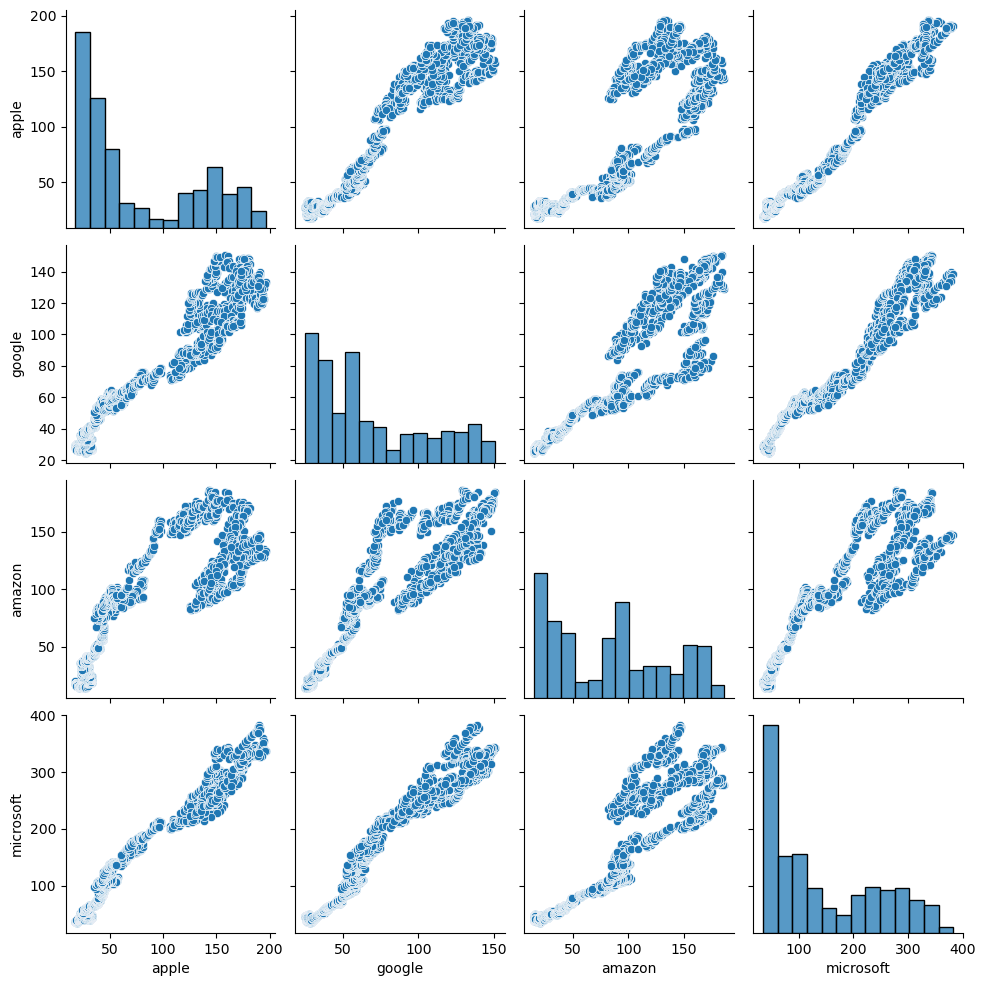

In [35]:
sns.pairplot(data=Close)

Correlation plot for Stock prices

<Axes: >

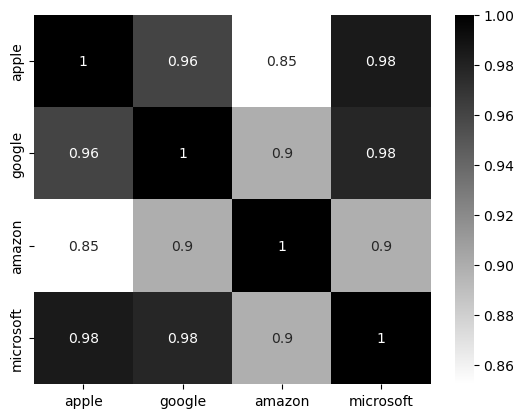

In [36]:
sns.heatmap(Close.corr(),annot=True,cmap='gray_r',linecolor="black")

Microsoft and Google are well Correlation with Correlation of 3.86 and 3.84 respectively. 

Whereas, the correlation of Apple and Amazon is 3.79 and 3.65 respectively.

The Correlation comparison is done with respect to "Closing Prices" of each Company.

# Comparing Close price of each company

Here, a stacked histogram chart, also known as a stacked bar chart or column chart, is used to compare the "Close" values across all the companies where, x-axis represents "Close Price" and y-axis represents the "Frequency".

In [37]:
Close.iplot(kind='hist', bins = 30, barmode = 'overlay', bargap=0.5)

# Analyze Daily return of each company & how they are co-related

Creating a blank DataFrame and merging the "1-day % return" values of each company in that new DataFrame

In [38]:
data=pd.DataFrame()

In [39]:
data['Apple_change']=((apple['Close']-apple['Open'])/apple['Close'])*100
data['Google_change']=((google['Close']-google['Open'])/google['Close'])*100
data['Amazon_change']=((amazon['Close']-amazon['Open'])/amazon['Close'])*100
data['Microsoft_change']=((microsoft['Close']-microsoft['Open'])/microsoft['Close'])*100

In [40]:
data.head()

Apple_change  Google_change  Amazon_change  Microsoft_change
Date                                                                    
2013-12-05     -0.836418       0.013240      -0.561782         -2.236838
2013-12-06     -1.030323       0.007480      -0.361802         -0.156407
2013-12-09      0.976291       0.663176      -0.836609          0.387491
2013-12-10      0.348330       0.784572       1.041826         -1.311992
2013-12-11     -1.004707      -0.938466      -1.347496         -1.196492

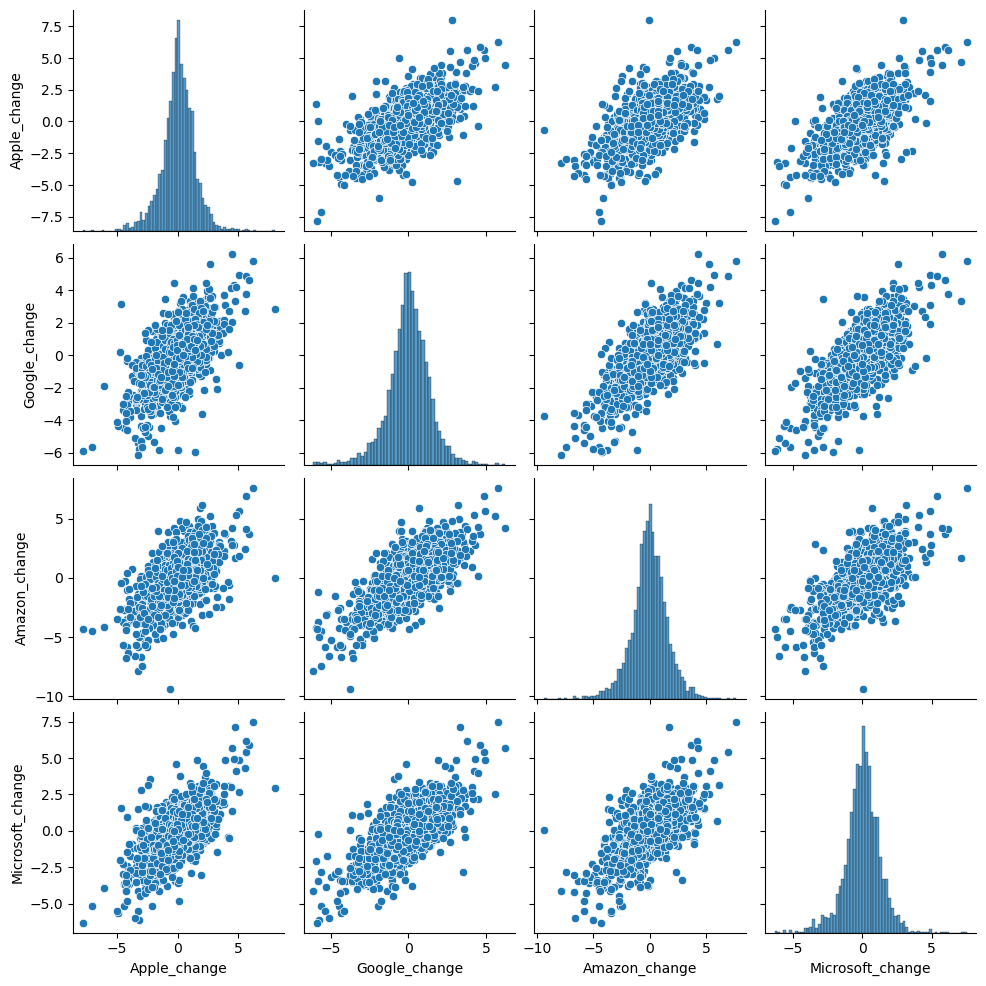

In [41]:
sns.pairplot(data=data)

Correlation plot for daily returns

<Axes: >

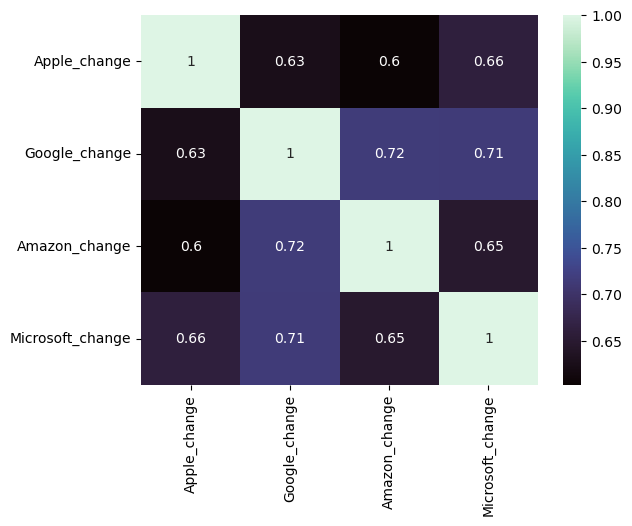

In [42]:
sns.heatmap(data.corr(), annot=True, cmap =  'mako', linecolor="black")

# Analyzing the Volatility of stock

Volatility is the rate at which a stock's price changes over a period of time.

In [43]:
df['Volatility'] = df.groupby('Company')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
df.head()

Company       Date       Open       High        Low      Close     Volume  \
0    AAPL 2013-12-05  20.451786  20.540714  20.228930  20.282143  447580000   
1    AAPL 2013-12-06  20.206785  20.241072  19.984644  20.000713  344352400   
2    AAPL 2013-12-09  20.032143  20.342142  20.032143  20.229643  320493600   
3    AAPL 2013-12-10  20.127857  20.281429  20.042856  20.198214  278269600   
4    AAPL 2013-12-11  20.250000  20.391787  19.988930  20.048571  359718800   

   1-day % return  Volatility  
0       -0.836418         NaN  
1       -1.030323         NaN  
2        0.976291         NaN  
3        0.348330         NaN  
4       -1.004707         NaN

In [44]:
fig = px.line(df, x='Date', y='Volatility', color='Company', title='Volatility of All Companies')
fig.show()

#### Conclusion

Exploratory data analysis (EDA) serves as a fundamental step in analyzing stock market data, providing a systematic and insightful approach to understanding market dynamics, identifying investment opportunities, and developing effective trading strategies. By applying EDA techniques, researchers and investors can gain valuable insights from complex financial datasets, making informed decisions and navigating the ever-changing stock market landscape.